# Exploratory Data Analysis - Individual Household Power Consumption Dataset



### Dataset Description
Power consumption prediction is a vital task to estimate the amount of power that has to be supplied to various locations at any given time. It has a direct bearing on the environment and helps to cut costs. Motivated by the applications of power consumption prediction and to demonstrate the effects of antagonistic manipulation and fortification on a multivariate time-series dataset, we chose the Electricity dataset from the UCI repository (Hebrail & Berard, 2012) in this research.

It consists of over 2 million rows and 9 columns sampled by minute in a household for 4 years from the end of 2006 to the end of 2010. global active power represents the active power consumed in kW and global reactive power represents the reactive power consumed in kW, voltage and global intensity represents the mean voltage in volts and mean current in amperes respectively. sub metering 1, sub metering 2, and sub metering 3 is the active energy readings from the kitchen, laundry room, and electric water heating and air conditioning equipment respectively. The unit of all sub-metering readings is in watt-hour. The active term refers to the total actual power consumed whereas the reactive term corresponds to the unused power in the transmission wires.

During preprocessing of the dataset, we treated the missing values (?) as null values (NaN) for simplicity. Each column has a NaN value, and we replace it with the mean of the respective column values. The values in the dataset are normalized using the smallest and largest values of the samples and they all lie in the range 0 and 1 to ensure consistency in predictions. We resampled the dataset daily, incorporating the average of the per-minute values thereby generating a dataset with 1400 samples to predict global active power. The distribution of global active power per day, per week, per month, and per quarter shows that the periodicity of the distribution decreases as the time interval increases.

In [1]:
import pandas as pd

# load all data
electricityDf = pd.read_csv('household_power_consumption.txt', sep=';', header=0,
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'], index_col='dt')# summarize
print(electricityDf.shape)
print(electricityDf.head())

<ipython-input-1-6954c0cac651>:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  electricityDf = pd.read_csv('household_power_consumption.txt', sep=';', header=0,
<ipython-input-1-6954c0cac651>:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  electricityDf = pd.read_csv('household_power_consumption.txt', sep=';', header=0,


(2075259, 7)
                     Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28

In [2]:
electricityDf.replace(['nan','?'], inplace=True)

<ipython-input-2-a6de281a0d94>:1: FutureWarning: DataFrame.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  electricityDf.replace(['nan','?'], inplace=True)


In [3]:
electricityDf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [4]:
electricityDf.dtypes

,0
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64


In [5]:
electricityDf.shape

(2075259, 7)

In [6]:
electricityDf.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [7]:
electricityDf.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [8]:
for j in range(1,7):
       print(electricityDf.iloc[:, j].unique())

[0.418 0.436 0.498 0.502 0.528 0.522 0.52  0.51  0.47  0.478 0.398 0.422
 0.282 0.152 0.156 0.    0.076 0.09  0.2   0.058 0.18  0.144 0.118 0.108
 0.202 0.192 0.186 0.116 0.136 0.148 0.16  0.158 0.1   0.082 0.05  0.052
 0.162 0.086 0.048 0.054 0.068 0.166 0.174 0.178 0.188 0.088 0.08  0.07
 0.084 0.074 0.106 0.092 0.064 0.046 0.138 0.134 0.132 0.12  0.13  0.154
 0.078 0.142 0.14  0.146 0.15  0.17  0.102 0.072 0.06  0.056 0.062 0.112
 0.066 0.172 0.168 0.194 0.184 0.096 0.164 0.182 0.094 0.098 0.176 0.19
 0.204 0.22  0.198 0.208 0.244 0.334 0.298 0.296 0.286 0.278 0.104 0.258
 0.238 0.256 0.214 0.23  0.21  0.24  0.124 0.122 0.27  0.302 0.272 0.25
 0.294 0.3   0.128 0.126 0.234 0.242 0.316 0.28  0.288 0.224 0.11  0.248
 0.254 0.222 0.246 0.216 0.212 0.114 0.206 0.228 0.226 0.196 0.218 0.368
 0.338 0.31  0.304 0.292 0.268 0.266 0.26  0.396 0.38  0.4   0.384 0.416
 0.404 0.382 0.232 0.314 0.312 0.262 0.252 0.236 0.348 0.342 0.34  0.35
 0.504 0.344 0.346 0.366 0.574 0.582 0.37  0.364 0.36  

In [9]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,7):
    if not electricityDf.iloc[:, j].notnull().all():
        droping_list_all.append(j)
        #print(df.iloc[:,j].unique())
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

In [10]:
# filling nan with mean in any columns

for j in range(0,7):
        electricityDf.iloc[:,j]=electricityDf.iloc[:,j].fillna(electricityDf.iloc[:,j].mean())

In [11]:
electricityDf.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.050655e+00,1.120142e-01,3.219643e+00,4.416490e+00,6.114397e+00,5.785470e+00,8.384178e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.300000e-01,1.020000e-01,2.409600e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [12]:
electricityDf['Global_active_power'].resample('D').sum()

,Global_active_power
dt,
2006-12-16,1209.176
2006-12-17,3390.460
2006-12-18,2203.826
2006-12-19,1666.194
2006-12-20,2225.748
...,...
2010-11-22,2041.536
2010-11-23,1577.536
2010-11-24,1796.248


<ipython-input-13-8f888111198e>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


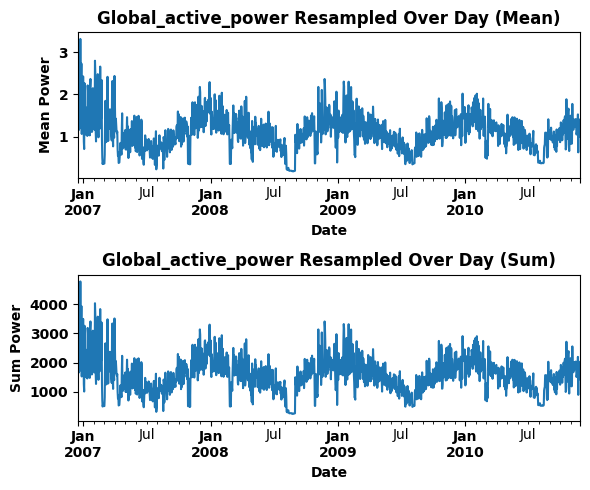

In [13]:
import matplotlib.pyplot as plt

# Resample and compute mean
mean_resampled = electricityDf['Global_active_power'].resample('D').mean()

# Resample and compute sum
sum_resampled = electricityDf['Global_active_power'].resample('D').sum()

# Create a single subplot
plt.figure(figsize=(6,5))
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
# Plot the mean series
plt.subplot(2, 1, 1)
mean_resampled.plot()
plt.title('Global_active_power Resampled Over Day (Mean)', fontweight='bold')
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Mean Power', fontweight='bold')

# Bold x-ticks and y-ticks
plt.tick_params(axis='both', which='major', labelcolor='black')  # Set font size for x-ticks and y-ticks
ax = plt.gca()  # Get the current axis
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')  # Make tick labels bold

# Plot the sum series
plt.subplot(2, 1, 2)
sum_resampled.plot()
plt.title('Global_active_power Resampled Over Day (Sum)', fontweight='bold')
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Sum Power', fontweight='bold')

# Bold x-ticks and y-ticks
plt.tick_params(axis='both', which='major', labelcolor='black')  # Set font size for x-ticks and y-ticks
ax = plt.gca()  # Get the current axis
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')  # Make tick labels bold

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('mean_and_sum_of_minutes.pdf', format='pdf')
plt.show()

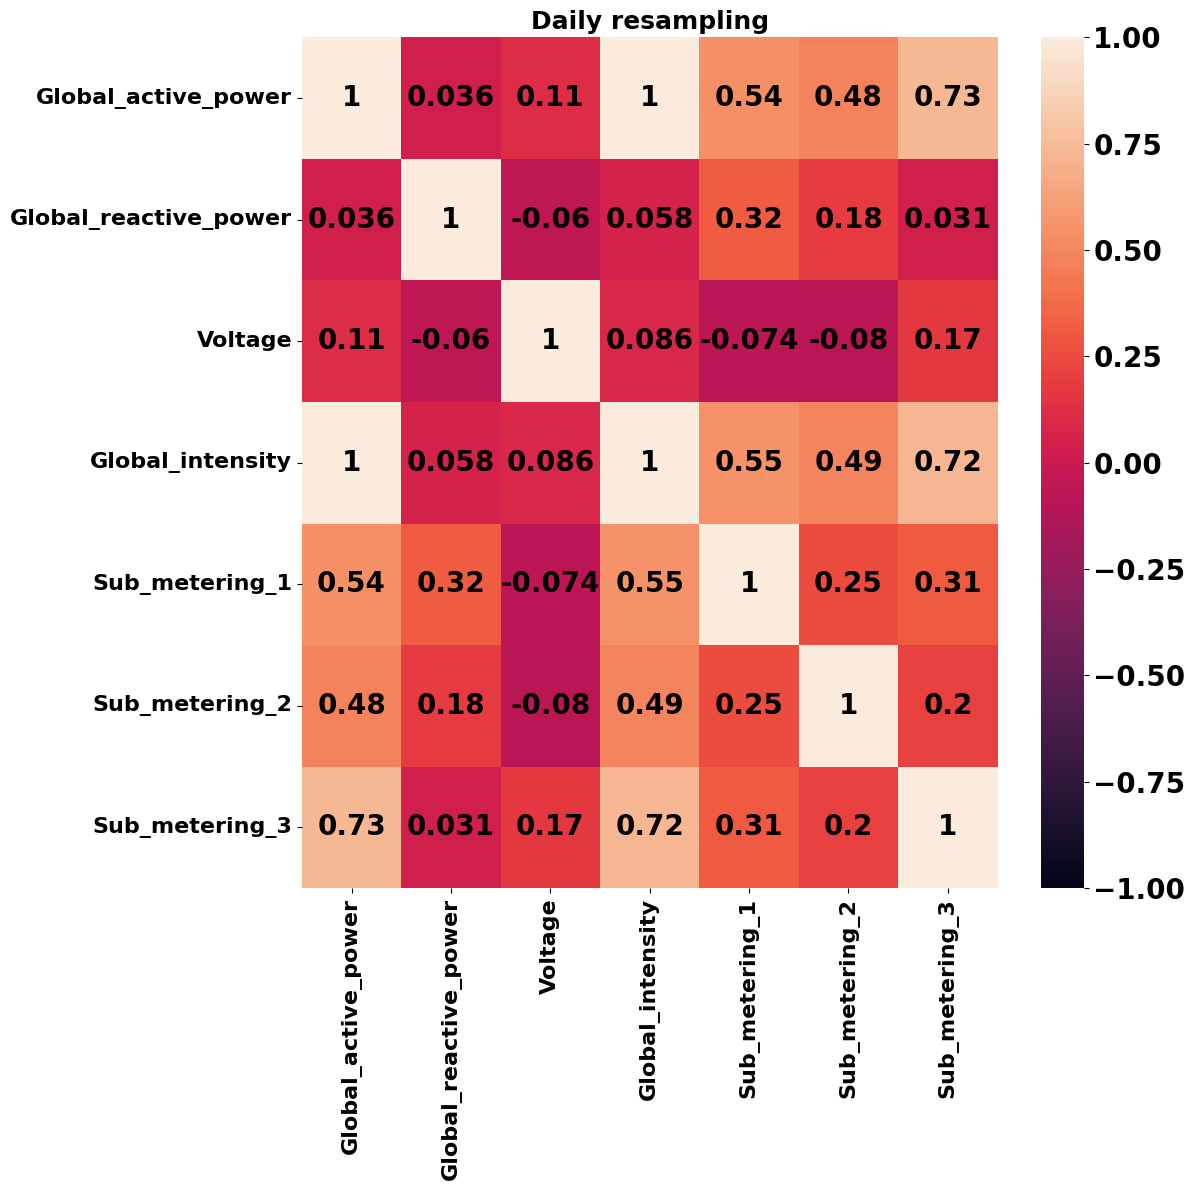

In [18]:
import seaborn as sns
f= plt.figure(figsize=(12,12))

dfh = electricityDf.resample('D').mean()
heatmap = sns.heatmap(dfh.corr(), vmin=-1, vmax=1, annot=True, annot_kws={"size":20, "weight":'bold', "color":'black'})
plt.title('Daily resampling', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')

# Bold and blacken the numbers in the correlation matrix
# for text in heatmap.texts:
#     text.set_fontweight('bold')  # Make numbers bold
#     text.set_color('black')  # Set color to black

colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=20)  # Set font size for colorbar ticks

# Bold colorbar tick labels
for label in colorbar.ax.get_yticklabels():
    label.set_fontweight('bold')  # Make colorbar tick labels bold

plt.tight_layout()
plt.savefig('correlation_matrix_daily.pdf', format='pdf')
plt.show()

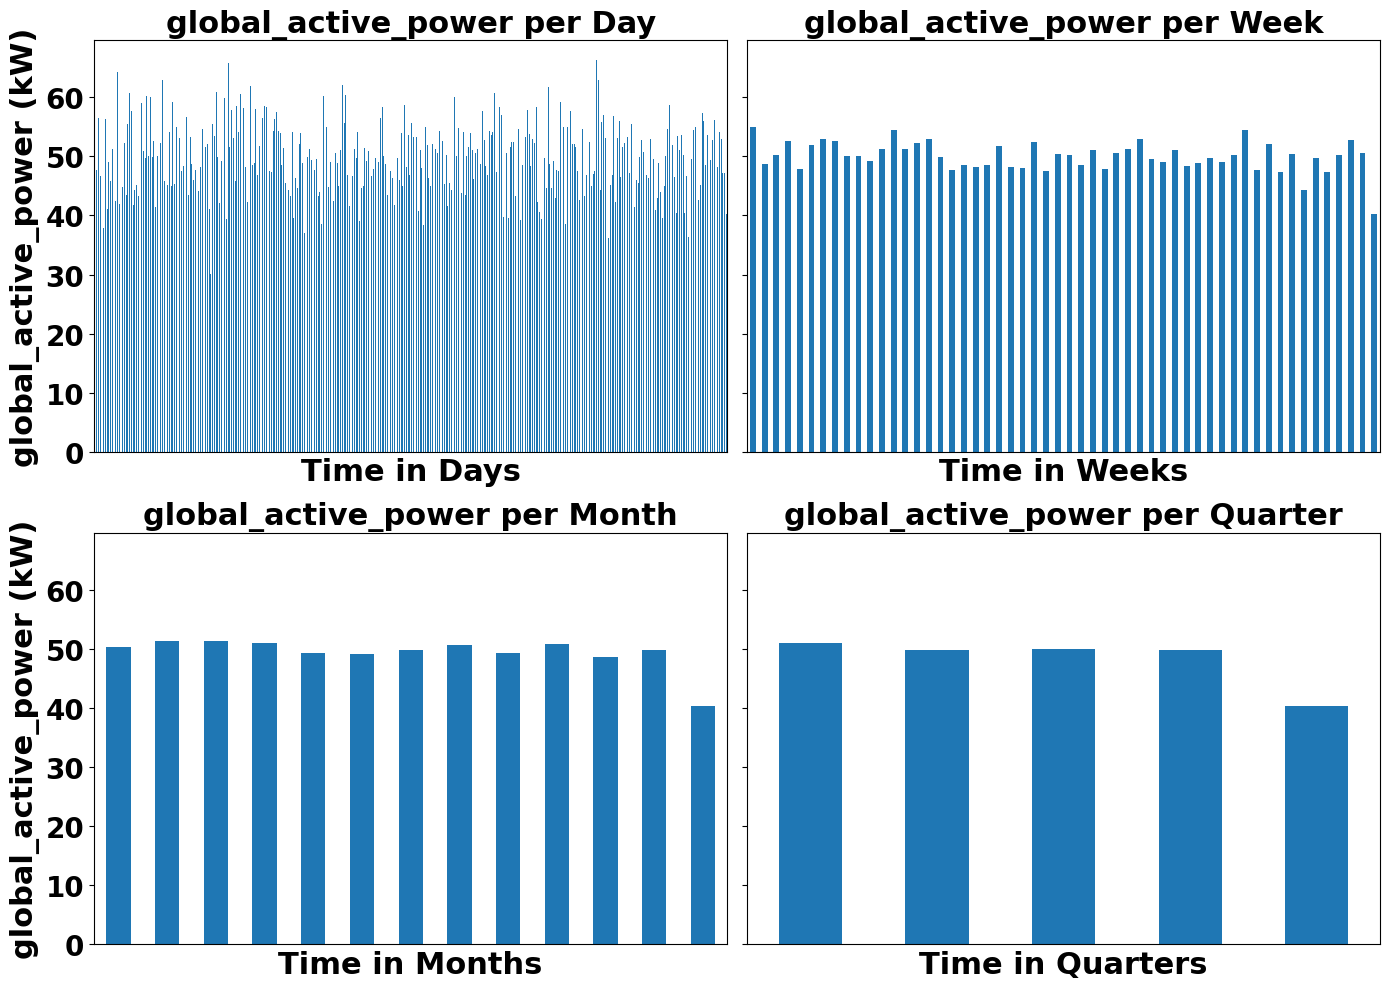

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for demonstration
date_rng = pd.date_range(start='2023-01-01', end='2024-01-01', freq='H')
electricityDf = pd.DataFrame(date_rng, columns=['date'])
electricityDf['Global_active_power'] = np.random.rand(len(date_rng)) * 100  # Random data using NumPy
electricityDf.set_index('date', inplace=True)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=False, sharey=True)  # sharex=False to allow individual x-axis settings

# Resample and plot for each time period
resample_periods = {
    'D': 'Day',
    'W': 'Week',
    'M': 'Month',
    'Q': 'Quarter'
}

for ax, (period, label) in zip(axs.flat, resample_periods.items()):
    data = electricityDf['Global_active_power'].resample(period).mean()
    data.plot(kind='bar', ax=ax)
    ax.set_title(f'global_active_power per {label}', fontsize=22, fontweight='bold')
    ax.set_ylabel('global_active_power (kW)', fontsize=22, fontweight='bold')
    ax.set_xlabel(f'Time in {label}s', fontsize=22, fontweight='bold')

    # Set font size for y-ticks
    ax.tick_params(axis='y', labelsize=20)

    # Bold y-tick labels
    for label in ax.get_yticklabels():
        label.set_fontweight('bold')

    # Remove x-ticks and x-tick labels if needed for clarity
    ax.set_xticks([])  # Remove x-ticks
    ax.set_xticklabels([])  # Remove x-tick labels if present

# Adjust layout
plt.tight_layout()
plt.show()
fig.savefig('periodicity.pdf', format='pdf')